In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [2]:
#CSV data from keggle 4 files
plant1_Gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Generation_Data.csv')

In [3]:
plant2_Gen = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Generation_Data.csv')

In [4]:
plant1_W = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_1_Weather_Sensor_Data.csv')

In [5]:
plant2_W = pd.read_csv('https://github.com/Mcristina1203/Data-Science-Final/raw/master/Plant_2_Weather_Sensor_Data.csv')

In [6]:
plant1_Gen[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
20,15-05-2020 00:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7116151.0
40,15-05-2020 00:15,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6339380.0
60,15-05-2020 00:30,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7007866.0
80,15-05-2020 00:45,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6782598.0
...,...,...,...,...,...,...,...
68680,17-06-2020 22:45,4135001,iCRJl6heRkivqQ3,0.0,0.0,5957.0,7426263.0
68700,17-06-2020 23:00,4135001,adLQvlD726eNBSB,0.0,0.0,6110.0,6524508.0
68720,17-06-2020 23:15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,5929.0,6770737.0
68740,17-06-2020 23:30,4135001,WRmjgnKYAwPKWDb,0.0,0.0,5953.0,7273532.0


In [7]:
plant1_W[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000
20,2020-05-15 05:00:00,4135001,HmiyD2TTLFNqkNe,24.177106,22.551908,0.000000
40,2020-05-15 10:00:00,4135001,HmiyD2TTLFNqkNe,28.632192,52.547736,0.670675
60,2020-05-15 15:00:00,4135001,HmiyD2TTLFNqkNe,33.890576,46.029081,0.398889
80,2020-05-15 20:00:00,4135001,HmiyD2TTLFNqkNe,22.663180,20.290726,0.000000
...,...,...,...,...,...,...
3100,2020-06-17 03:30:00,4135001,HmiyD2TTLFNqkNe,22.771295,22.362781,0.000000
3120,2020-06-17 08:30:00,4135001,HmiyD2TTLFNqkNe,24.255999,32.832243,0.275448
3140,2020-06-17 13:30:00,4135001,HmiyD2TTLFNqkNe,28.954923,44.689929,0.659398
3160,2020-06-17 18:30:00,4135001,HmiyD2TTLFNqkNe,23.840239,22.968658,0.007007


In [8]:
plant1_W[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000
20,2020-05-15 05:00:00,4135001,HmiyD2TTLFNqkNe,24.177106,22.551908,0.000000
40,2020-05-15 10:00:00,4135001,HmiyD2TTLFNqkNe,28.632192,52.547736,0.670675
60,2020-05-15 15:00:00,4135001,HmiyD2TTLFNqkNe,33.890576,46.029081,0.398889
80,2020-05-15 20:00:00,4135001,HmiyD2TTLFNqkNe,22.663180,20.290726,0.000000
...,...,...,...,...,...,...
3100,2020-06-17 03:30:00,4135001,HmiyD2TTLFNqkNe,22.771295,22.362781,0.000000
3120,2020-06-17 08:30:00,4135001,HmiyD2TTLFNqkNe,24.255999,32.832243,0.275448
3140,2020-06-17 13:30:00,4135001,HmiyD2TTLFNqkNe,28.954923,44.689929,0.659398
3160,2020-06-17 18:30:00,4135001,HmiyD2TTLFNqkNe,23.840239,22.968658,0.007007


In [9]:
plant2_W[0::20]

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.000000
20,2020-05-15 05:00:00,4136001,iq8k7ZNt4Mwm3w0,25.117599,24.104580,0.000000
40,2020-05-15 10:00:00,4136001,iq8k7ZNt4Mwm3w0,31.892094,46.131174,0.828096
60,2020-05-15 15:00:00,4136001,iq8k7ZNt4Mwm3w0,37.115580,50.190043,0.653807
80,2020-05-15 20:00:00,4136001,iq8k7ZNt4Mwm3w0,31.447316,28.390590,0.000000
...,...,...,...,...,...,...
3160,2020-06-16 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.738335,22.686434,0.000000
3180,2020-06-17 04:15:00,4136001,iq8k7ZNt4Mwm3w0,22.948315,22.223760,0.000000
3200,2020-06-17 09:15:00,4136001,iq8k7ZNt4Mwm3w0,24.040445,24.950210,0.120617
3220,2020-06-17 14:15:00,4136001,iq8k7ZNt4Mwm3w0,28.609256,37.979448,0.393014


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [13]:
features = [
    'DATE_TIME',
    'PLANT_ID', 
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE'
    
]
x = plant1_W[features]
y = plant1_W['IRRADIATION']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=3)

print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(2068, 4)
(2068,)
(1114, 4)
(1114,)


In [14]:
features = [
    'DATE_TIME',
    'PLANT_ID', 
    'SOURCE_KEY',
    'DC_POWER', 
    'AC_POWER', 
    'DAILY_YIELD'
    
]
x = plant1_Gen[features]
y = plant1_Gen['TOTAL_YIELD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=3)

print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(44705, 6)
(44705,)
(24073, 6)
(24073,)


In [15]:
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=45, random_state=32)

In [17]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [18]:
def predict(x_train, y_train, x_test, model):
    model.fit(x_train, y_train)
    return model.predict(x_test)

def predictProb(x_train, y_train, x_test, model):
    model.fit(x_train, y_train)
    return model.predict_proba(x_test)

In [19]:
def accuracy(x_train, y_train, x_test, y_test, model_tuples):
    """
    model_tuples -> [('model description', model_object),...]
    """
    _dict = {desc: accuracy_score(y_test, predict(x_train, y_train, x_test, model)) for (desc, model) in model_tuples}
    df = pd.DataFrame()
    df['Model'], df['Accuracy'] = _dict.keys(), _dict.values()
    return df

def computeROCmatrics(y_test, y_predict_prob, positive_label=1):
    """
    return -> (fpr, tpr, AUC, thresholds)
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,positive_label-1], pos_label=positive_label)
    AUC = metrics.auc(fpr, tpr)
    return (fpr, tpr, AUC, thresholds)

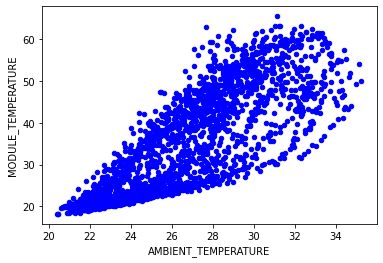

In [20]:
#Plant 1
plant1_W.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='blue')

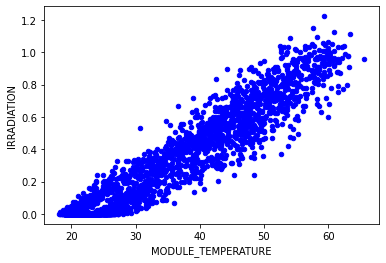

In [21]:
plant1_W.plot(kind='scatter',x='MODULE_TEMPERATURE',y='IRRADIATION',color='blue')

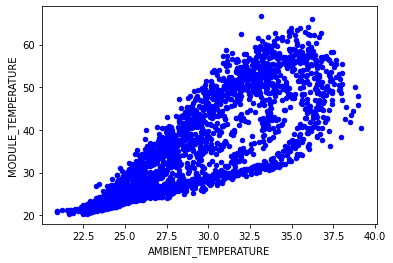

In [22]:
#Plant 2
plant2_W.plot(kind='scatter',x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',color='blue')

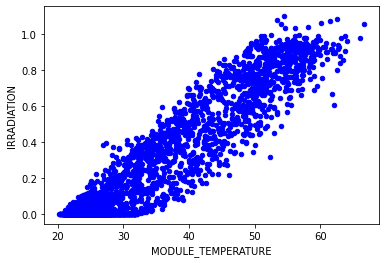

In [23]:
plant2_W.plot(kind='scatter',x='MODULE_TEMPERATURE',y='IRRADIATION',color='blue')

In [24]:
#Conclusion Plant 2 has weaker ambient temperature and module temperature 
# The Ambient temperature raises module temperature and affects DC and AC power by solar power generator.
# In order to predict the cleaning and maintenance we have to train it on linear regression model for plant 2 data
# use plant 2

x_train, y_train = plant1_W[['AMBIENT_TEMPERATURE']], plant1_W['MODULE_TEMPERATURE']

In [25]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [26]:
x_test, y_test = plant2_W[['AMBIENT_TEMPERATURE']], plant2_W['MODULE_TEMPERATURE']

In [27]:
y_pred = linear_model.predict(x_test)
y_pred
#prediction from linear regression t find out mean absolute error

array([35.68780047, 35.30102462, 34.68083382, ..., 24.298416  ,
       24.09966661, 23.82452082])

In [28]:
mean_absolute_error(y_test, y_pred)

6.832550538736293

In [29]:
# now we take plannt 1 and 2 irradiation and compare error 
x_train, y_train = plant2_W[['MODULE_TEMPERATURE']], plant2_W['IRRADIATION']

In [30]:
x_train, y_train = plant1_W[['MODULE_TEMPERATURE']], plant1_W['IRRADIATION']

In [31]:
inear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(x_test)
y_pred

array([0.13190759, 0.12898323, 0.12429406, ..., 0.04579415, 0.04429144,
       0.0422111 ])

In [33]:
#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)

32.61538282012105

In [34]:
#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)

32.61538282012105

In [35]:
#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)#HIGHER ERROR FOR IRRADIATIONf
mean_absolute_error(y_test, y_pred)

32.61538282012105

Text(0, 0.5, 'DC POWER ( kW )')

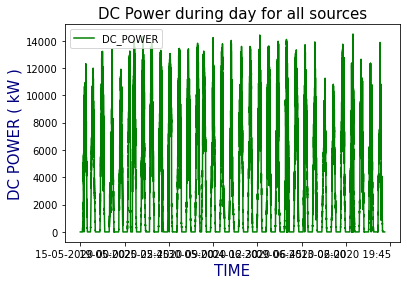

In [36]:
import matplotlib.pyplot as plt

# dc_power X date_time for plant1

plant1_Gen.plot(kind='line',x='DATE_TIME',y='DC_POWER', color='green')
plt.title('DC Power during day for all sources',size=15)
plt.xlabel('TIME',color='navy',fontsize=15)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=15)

Text(0, 0.5, 'DC POWER ( kW )')

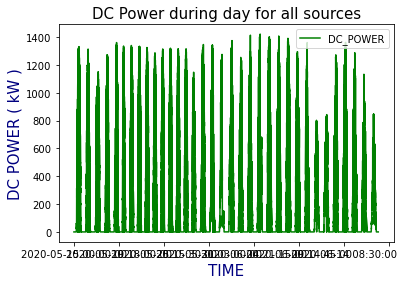

In [37]:
import matplotlib.pyplot as plt

# dc_power X date_time for plant2

plant2_Gen.plot(kind='line',x='DATE_TIME',y='DC_POWER', color='green')
plt.title('DC Power during day for all sources',size=15)
plt.xlabel('TIME',color='navy',fontsize=15)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=15)

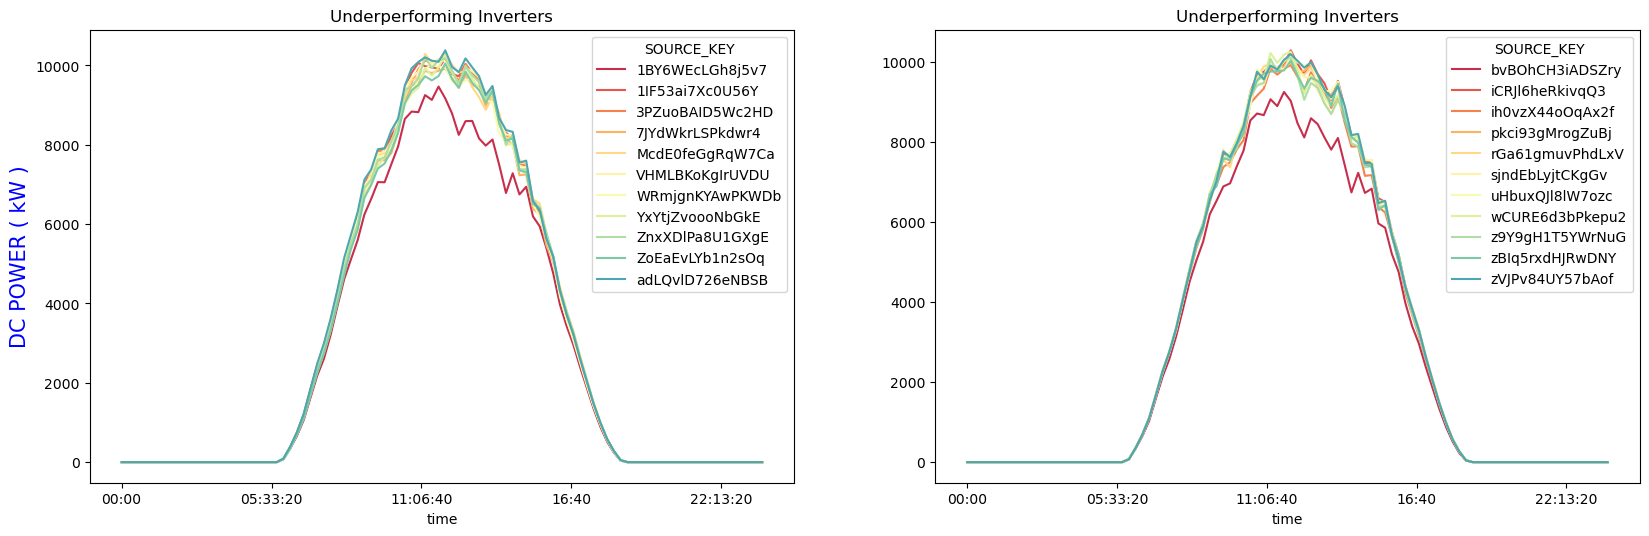

In [43]:
import seaborn as sns
dc_gen=plant1_Gen.copy()
dc_gen['DATE_TIME'] = pd.to_datetime(dc_gen['DATE_TIME'], errors='coerce')
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('Underperforming Inverters')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=15,color='blue')
ax[1].set_title('Underperforming Inverters')
plt.show()

In [67]:
plant1_Gen['time']=plant1_Gen['DATE_TIME'].dt.time
plant1_Gen['day']=plant1_Gen['DATE_TIME'].dt.date# Module temperature and Ambient Temperature on Plant1
ax= plant1_W.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant1_W.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()# Module temperature and Ambient Temperature on Plant1
ax= plant1_W.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant1_W.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()# Module temperature and Ambient Temperature on Plant1
ax= plant1_W.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant1_W.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()Can we identify faulty or suboptimally performing equipment?

In order to identify faulty or sub optimally performing equipment we’d first need to look at the DC power generated during the day along with finding out which inverters seem to be underperforming. To do this, I plotted DC_Power against Time while grouping by the Source_Key. This showed that the inverters with source keys 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry are both not performing quite as well as other inverters however, this might imply that they need to be replaced or just that they need some maintenance done. Lastly, I plotted DC_Power against Daily_Yield for both plants, this highlighted a consistency in something wrong with plant 1. To further investigate I plotted Module_Temperature against Ambient Temperature. This showed that the plant did not seem to be working at all in between 2020-05-19 to 2020-05-21. Here we can assume there is a technical difficulty with Plant1. So, in short, yes we can identify some faulty or sub optimally performing equipment through implications of the gathered/provided data and the right deduced reasoning. Can we identify faulty or suboptimally performing equipment?

In order to identify faulty or sub optimally performing equipment we’d first need to look at the DC power generated during the day along with finding out which inverters seem to be underperforming. To do this, I plotted DC_Power against Time while grouping by the Source_Key. This showed that the inverters with source keys 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry are both not performing quite as well as other inverters however, this might imply that they need to be replaced or just that they need some maintenance done. Lastly, I plotted DC_Power against Daily_Yield for both plants, this highlighted a consistency in something wrong with plant 1. To further investigate I plotted Module_Temperature against Ambient Temperature. This showed that the plant did not seem to be working at all in between 2020-05-19 to 2020-05-21. Here we can assume there is a technical difficulty with Plant1. So, in short, yes we can identify some faulty or sub optimally performing equipment through implications of the gathered/provided data and the right deduced reasoning. Can we identify faulty or suboptimally performing equipment?

In order to identify faulty or sub optimally performing equipment we’d first need to look at the DC power generated during the day along with finding out which inverters seem to be underperforming. To do this, I plotted DC_Power against Time while grouping by the Source_Key. This showed that the inverters with source keys 1BY6WEcLGh8j5v7 & bvBOhCH3iADSZry are both not performing quite as well as other inverters however, this might imply that they need to be replaced or just that they need some maintenance done. Lastly, I plotted DC_Power against Daily_Yield for both plants, this highlighted a consistency in something wrong with plant 1. To further investigate I plotted Module_Temperature against Ambient Temperature. This showed that the plant did not seem to be working at all in between 2020-05-19 to 2020-05-21. Here we can assume there is a technical difficulty with Plant1. So, in short, yes we can identify some faulty or sub optimally performing equipment through implications of the gathered/provided data and the right deduced reasoning. 

# just for columns
cols=plant1_Gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

/Users/dakotatownsend/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
/Users/dakotatownsend/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


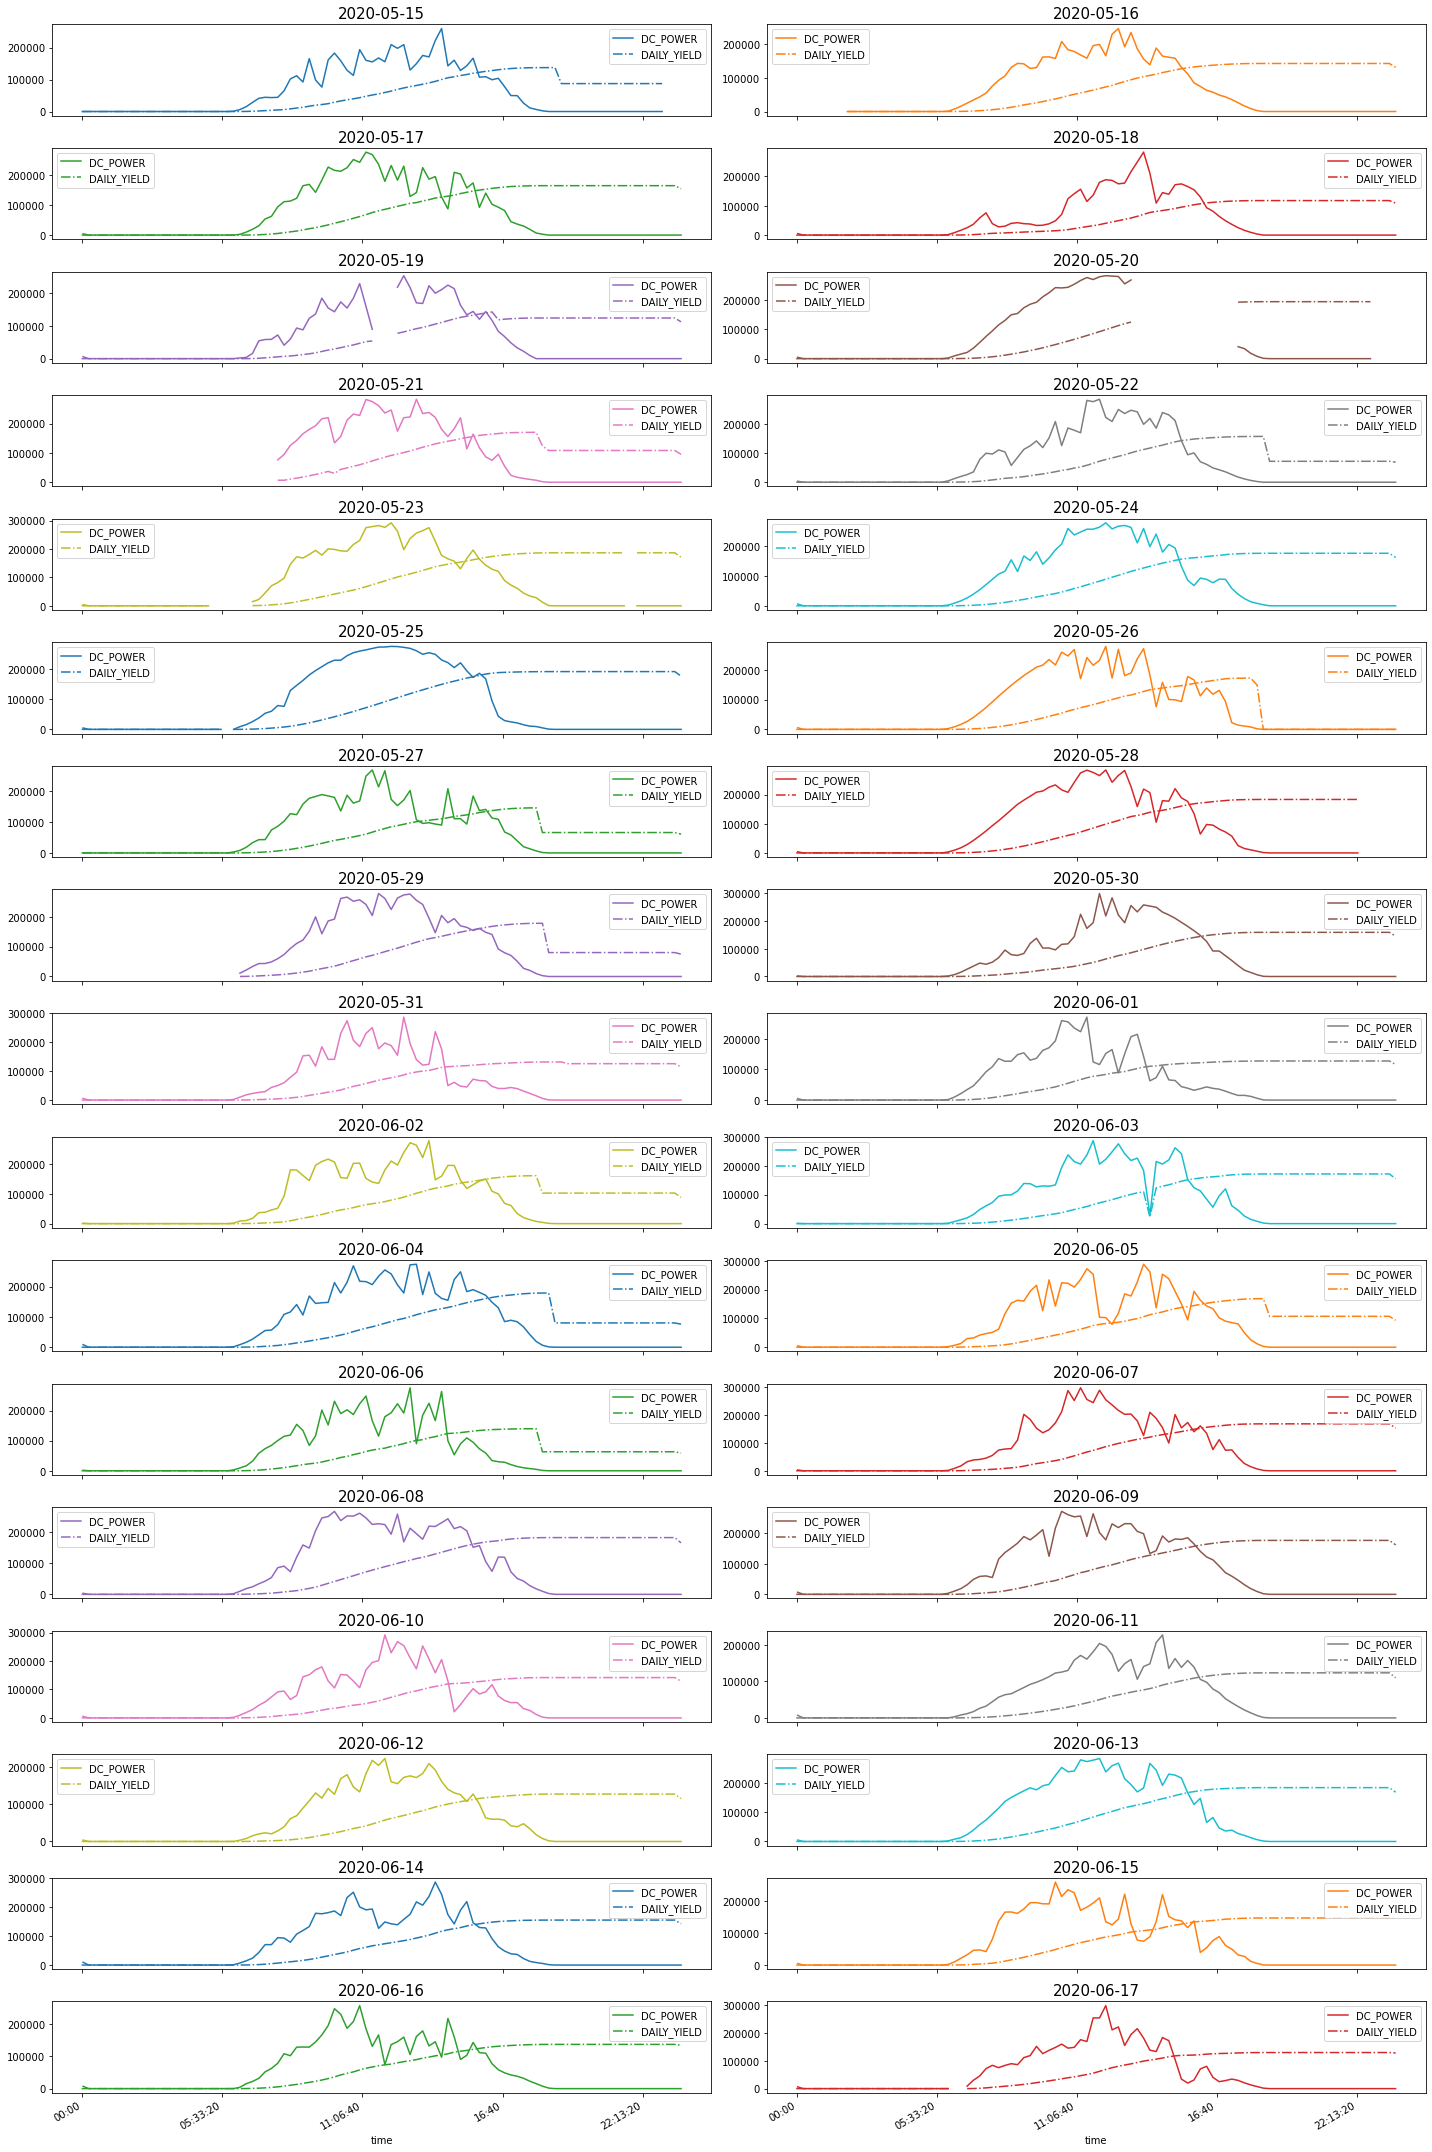

In [68]:
ax =plant1_Gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
plant1_Gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

In [71]:
plant2_Gen['time']=plant2_Gen['DATE_TIME'].dt.time
plant2_Gen['day']=plant2_Gen['DATE_TIME'].dt.date

# just for columns
cols=plant2_Gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

/Users/dakotatownsend/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
/Users/dakotatownsend/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


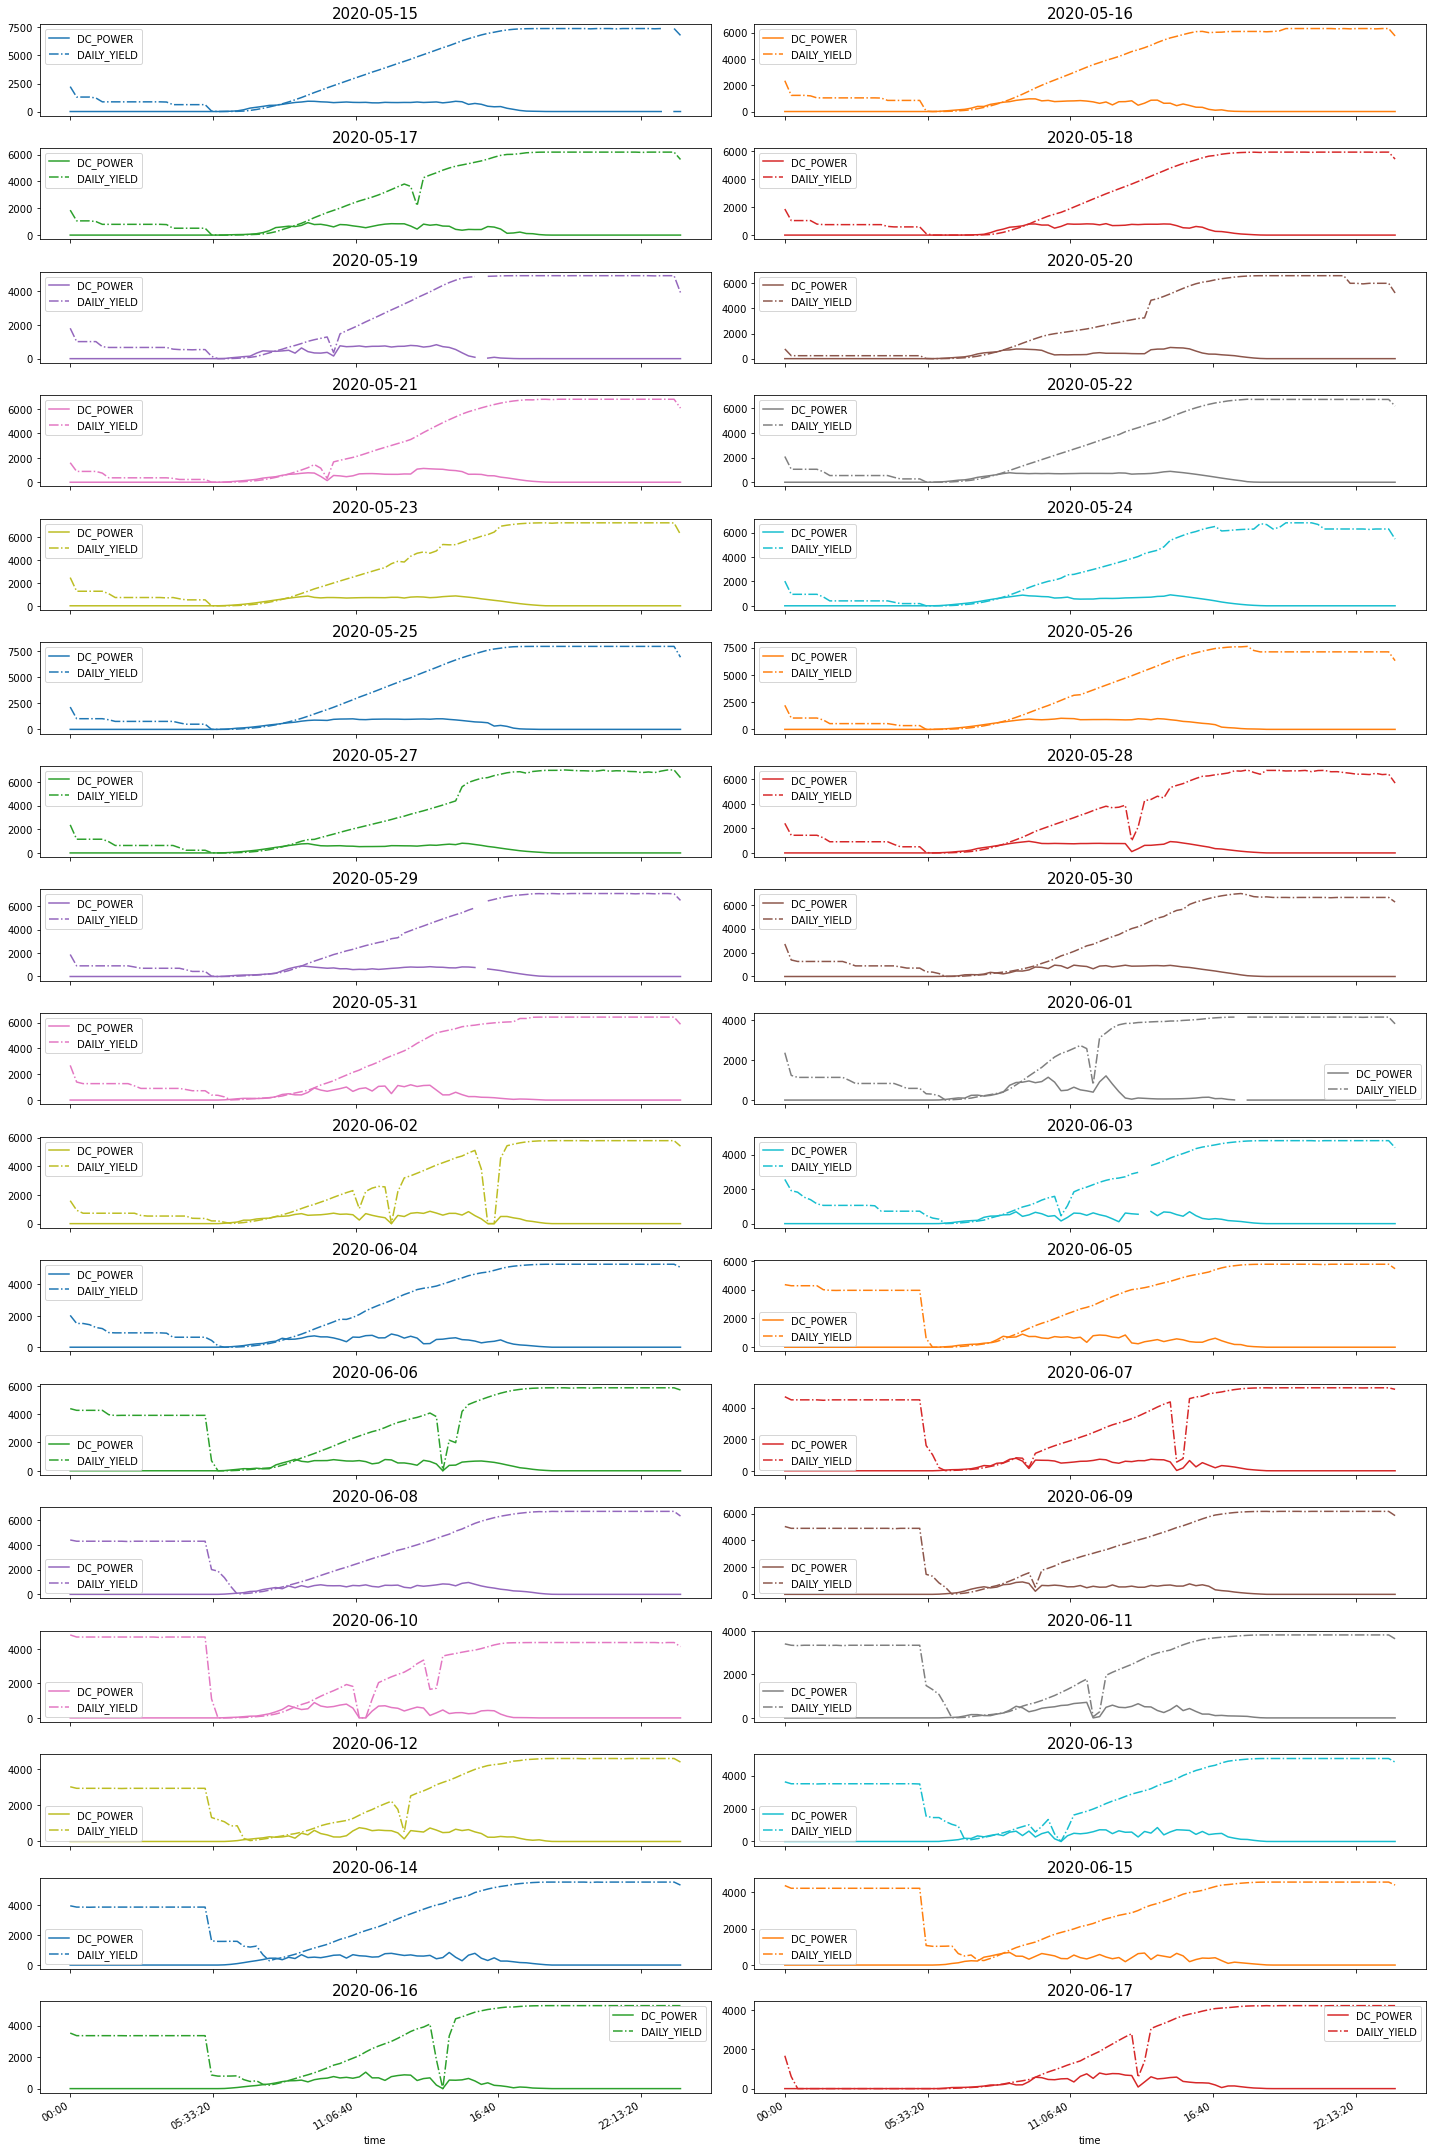

In [72]:
ax =plant2_Gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
plant2_Gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

/Users/dakotatownsend/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(


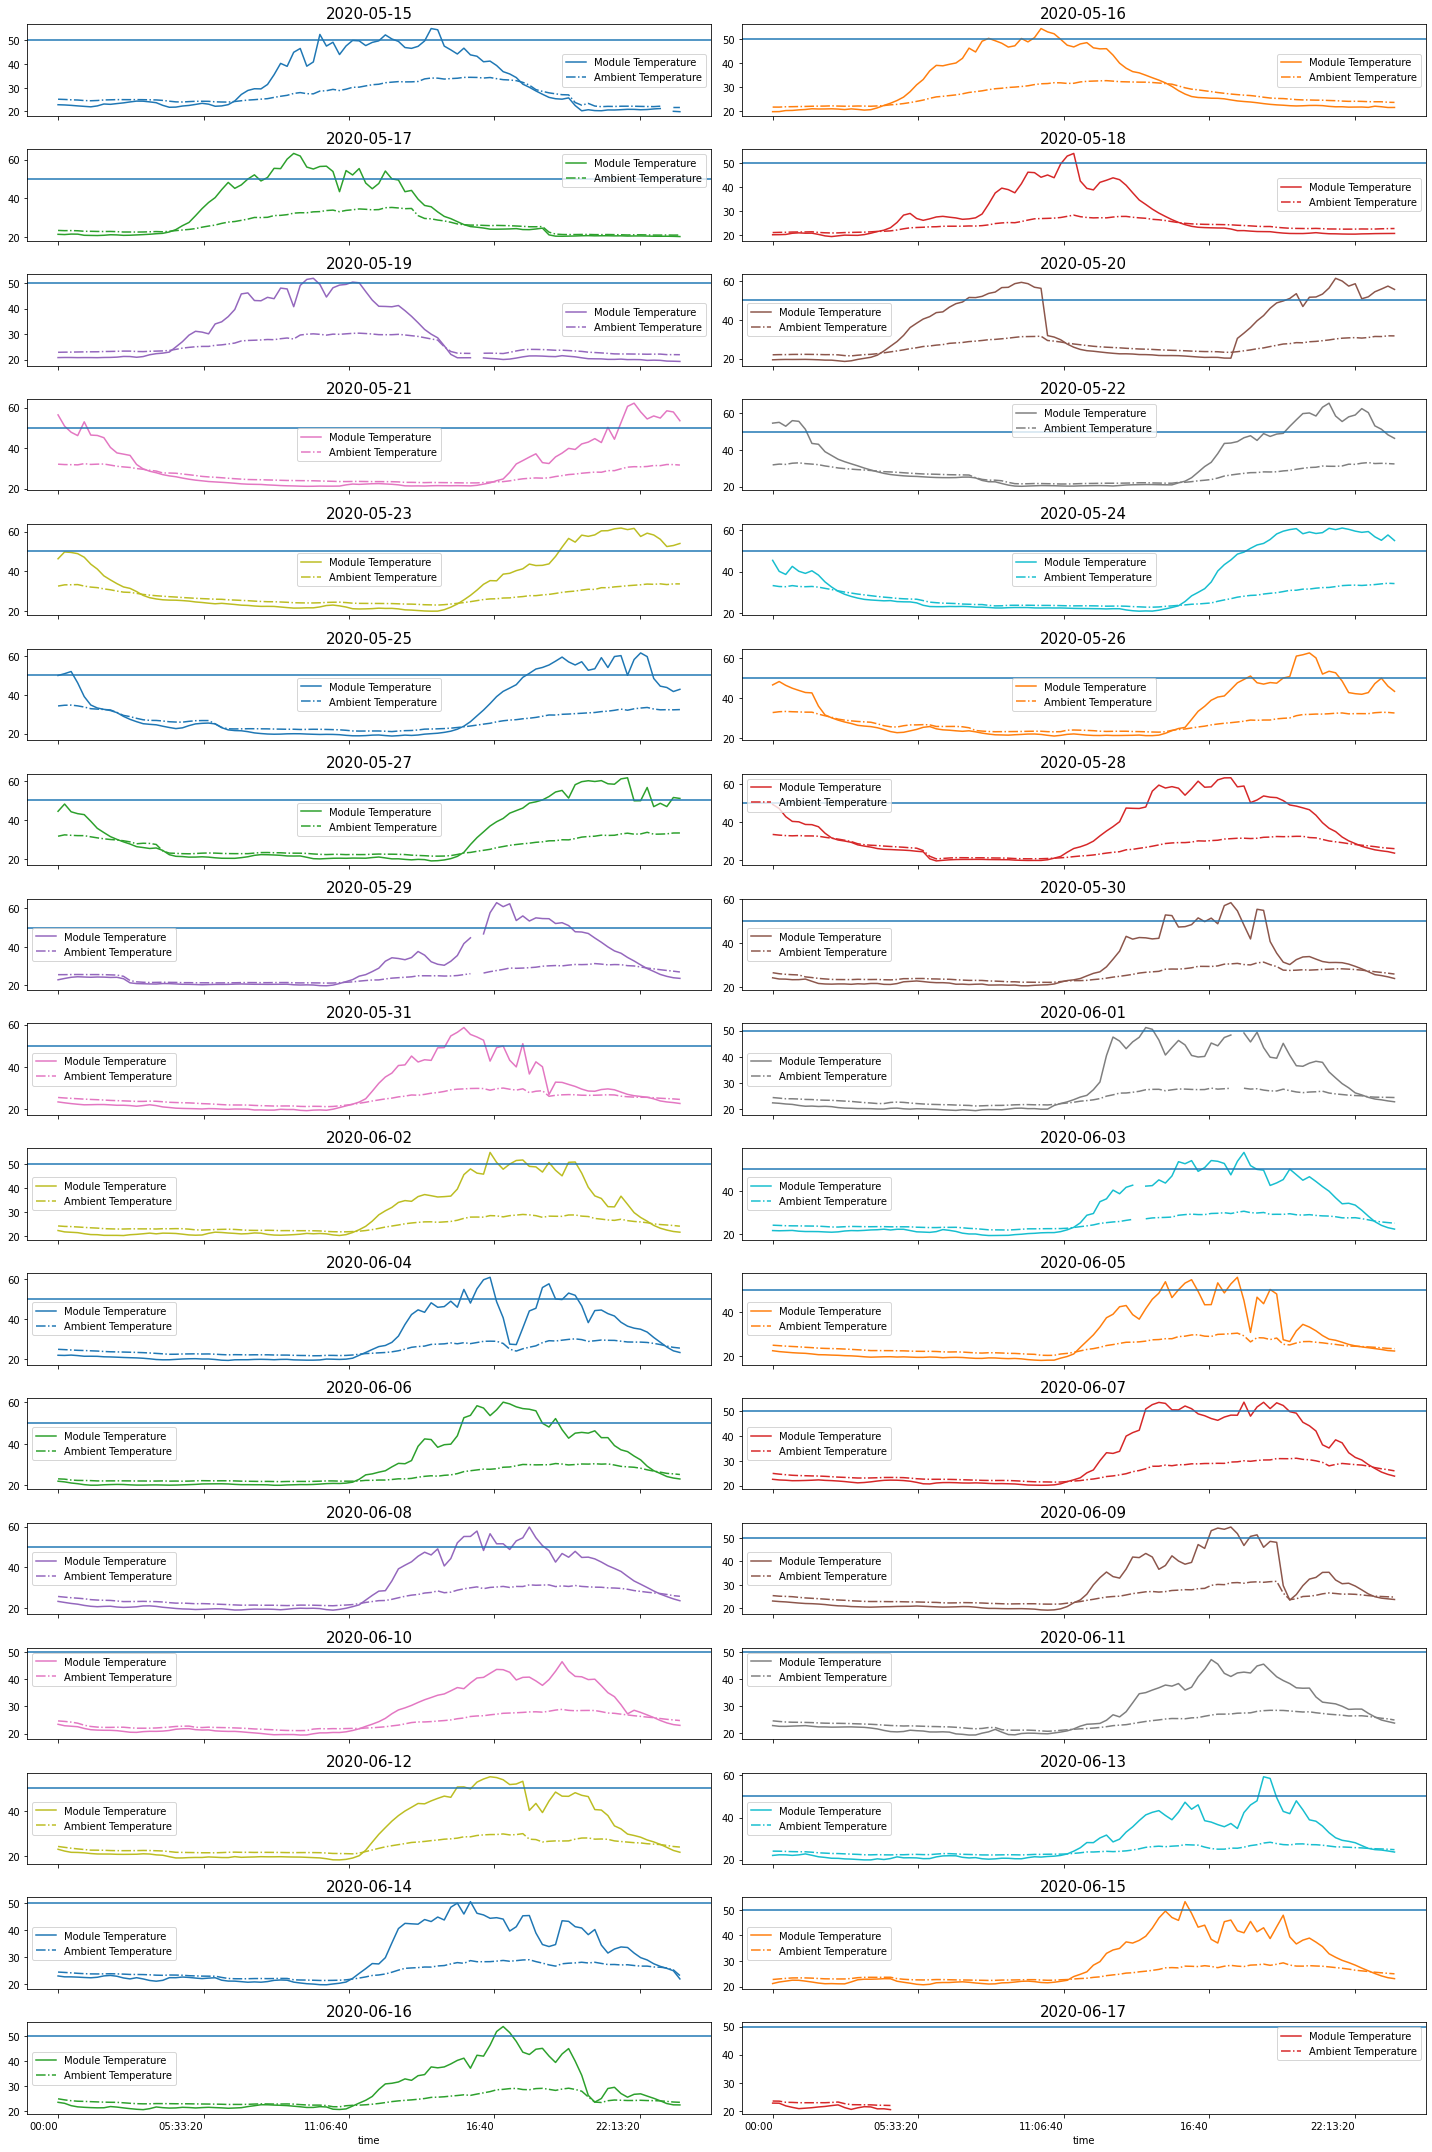

In [74]:
# Module temperature and Ambient Temperature on Plant1
ax= plant1_W.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
plant1_W.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()